# Augmented Dickey-Fuller test demo

This notebook shows how to use the Augmented Dickey-Fuller (ADF) test to decide whether a time series is stationary.

## 0 Setup

In [1]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load("tseries", "pracma", "TSA")

library(tseries)
library(pracma)
library(TSA)

Loading required package: pacman


## 1 White noise series

Let's start with a white noise series, which should come out as stationary.

In [2]:
set.seed(14)
white.noise <- ts(rnorm(1000))

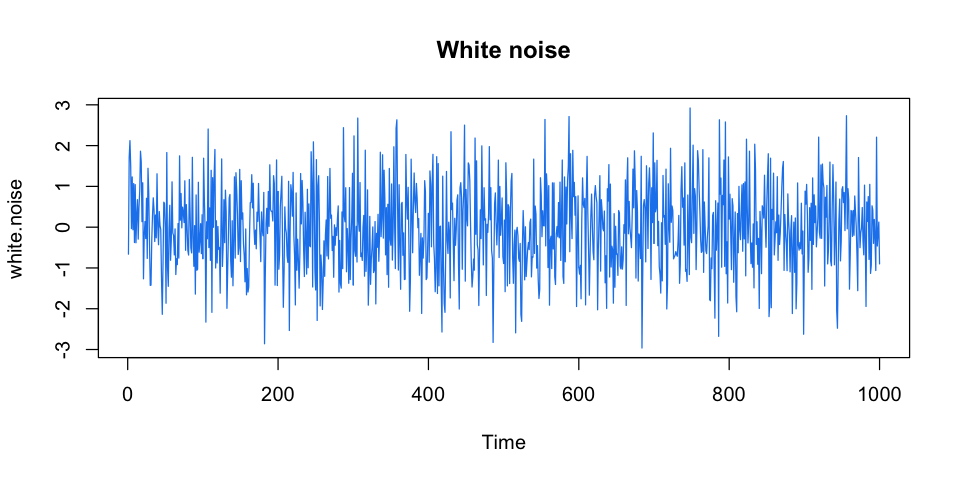

In [3]:
options(repr.plot.width=8, repr.plot.height=4)
plot(white.noise, main="White noise", col="dodgerblue2")

In [4]:
adf.test(white.noise)

Warning message in adf.test(white.noise):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  white.noise
Dickey-Fuller = -9.9065, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


The p-value is < 0.01, so we reject the null hypothesis, which asserts non-stationarity. In other words, we classify this as a stationary series.

## 2 Moving average of a white noise series

The moving average of a white noise series, like the underlying white noise series, stationary. Let's verify that.

In [5]:
moving.avg <- ts(movavg(white.noise, n=5, type="s"))

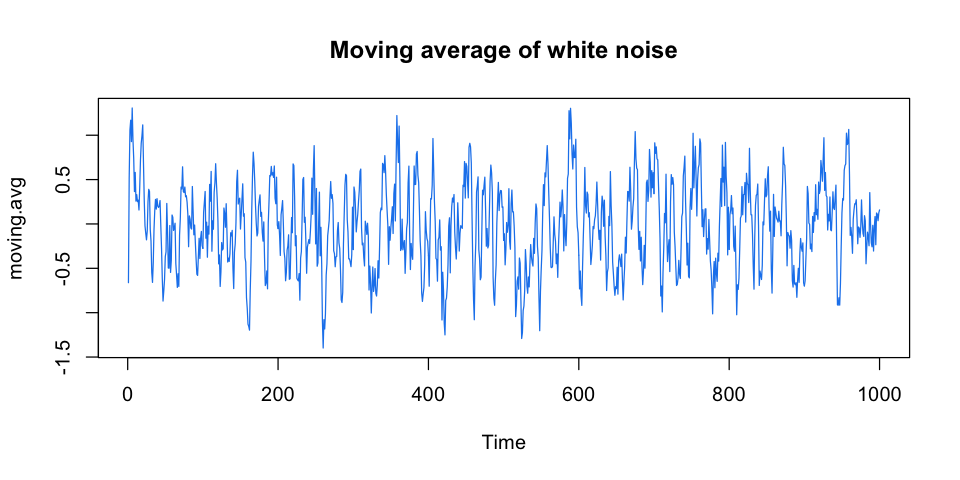

In [6]:
options(repr.plot.width=8, repr.plot.height=4)
plot(moving.avg, main="Moving average of white noise", col="dodgerblue2")

In [7]:
adf.test(moving.avg)

Warning message in adf.test(moving.avg):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  moving.avg
Dickey-Fuller = -10.47, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


As expected, the p-value is under 0.01, so we classify this as a stationary series.

## 3 Random walk series

In [8]:
random.walk <- ts(cumsum(white.noise))

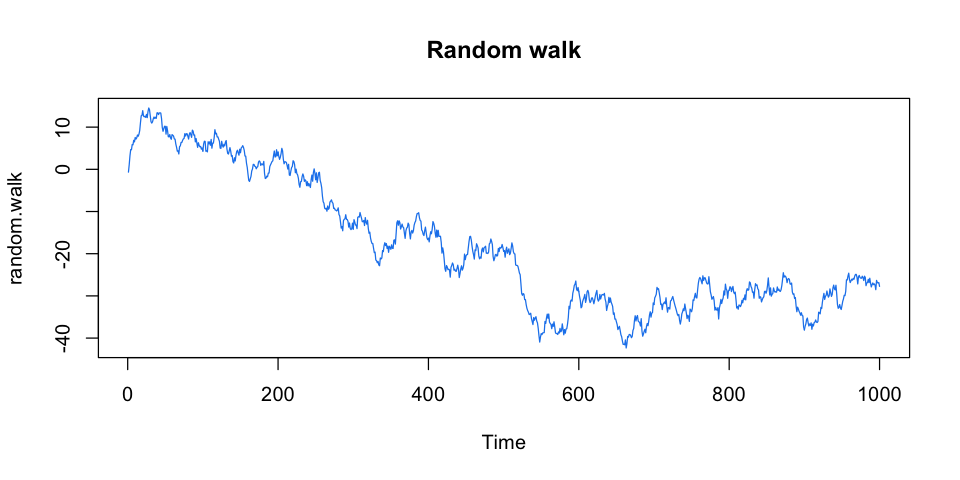

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
plot(random.walk, main="Random walk", col="dodgerblue2")

In [10]:
adf.test(random.walk)


	Augmented Dickey-Fuller Test

data:  random.walk
Dickey-Fuller = -1.9172, Lag order = 9, p-value = 0.6134
alternative hypothesis: stationary


Here the p-value is 0.6134, so we accept the null hypothesis, which asserts non-stationarity. This makes sense since the series mean function is not constant.

## 4 Trend, no seasonality

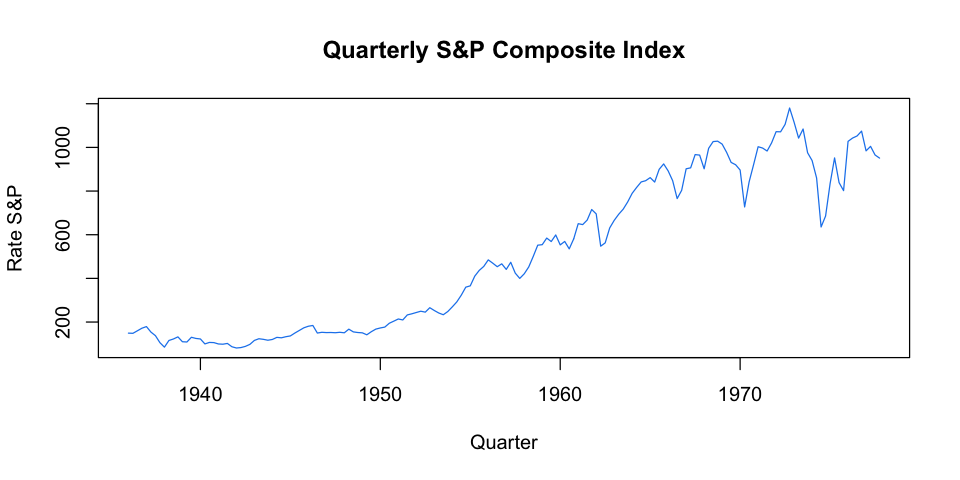

In [11]:
data(SP)
plot(SP,
     main="Quarterly S&P Composite Index",
     xlab="Quarter",
     ylab="Rate S&P",
     col="dodgerblue2")

In [12]:
adf.test(SP)


	Augmented Dickey-Fuller Test

data:  SP
Dickey-Fuller = -3.2617, Lag order = 5, p-value = 0.0799
alternative hypothesis: stationary


Here we fail to reject non-stationarity, but the p-value of 0.0799 was somewhat low. This is because we're using the default lag order, which here is 5, and this means that we're looking at a narrow window about any given point. With that window it still looks non-stationary, but just barely. So let's expand that window a bit, using the lag order parameter, _k_.

In [13]:
adf.test(SP, k=20)


	Augmented Dickey-Fuller Test

data:  SP
Dickey-Fuller = -1.3721, Lag order = 20, p-value = 0.8384
alternative hypothesis: stationary


With this larger lag order, the p-value is much higher. We fail to reject the null hypothesis, and classify the series as non-stationary.

## 5 Seasonality, no (or weak) trend

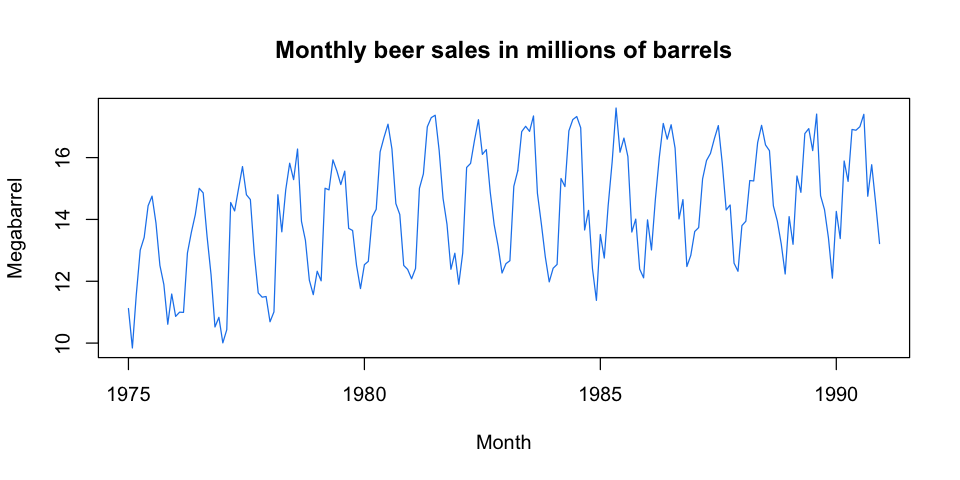

In [14]:
data(beersales)
plot(beersales,
     main="Monthly beer sales in millions of barrels",
     xlab="Month",
     ylab="Megabarrel",
     col="dodgerblue2")

In [15]:
adf.test(beersales)

Warning message in adf.test(beersales):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  beersales
Dickey-Fuller = -9.7734, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Again we're using a small default lag order, so the test can't see the seasonality. This is monthly data, so let's try again with lag order = 12.

In [20]:
adf.test(beersales, k=12)


	Augmented Dickey-Fuller Test

data:  beersales
Dickey-Fuller = -1.8232, Lag order = 12, p-value = 0.6501
alternative hypothesis: stationary


## 5 Trend and seasonality

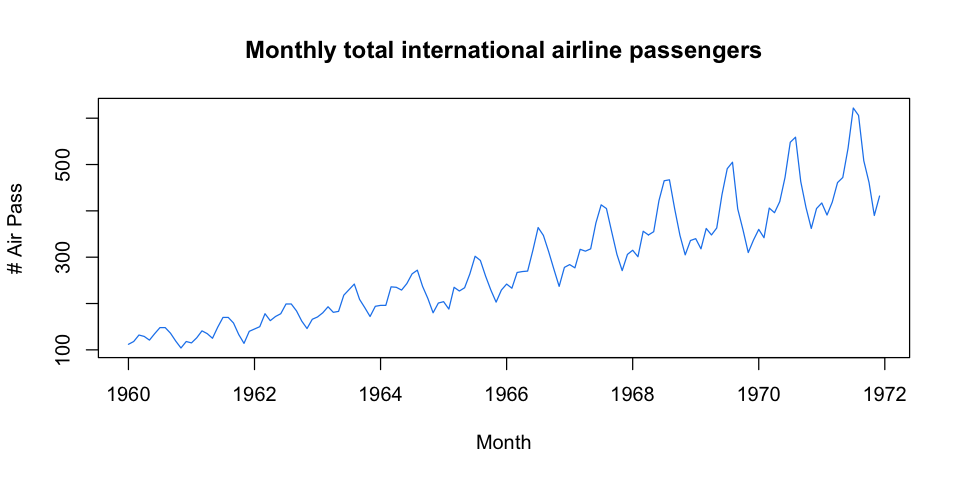

In [16]:
data(airpass)
plot(airpass,
     main="Monthly total international airline passengers",
     xlab="Month",
     ylab="# Air Pass",
     col="dodgerblue2")

In [17]:
adf.test(airpass)

Warning message in adf.test(airpass):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  airpass
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Surprisingly, the test rejects the null hypothesis, classifying this as a stationary series. Clearly it is not stationary: there is clear annual seasonality, which means that the mean function isn't constant. The reason is once again related to the lag order, which is 5. With that lag order the test can't see far enough to detect the seasonality. Let's expand the lag order to 12, since there are 12 months in a year.

In [18]:
adf.test(airpass, k=12)


	Augmented Dickey-Fuller Test

data:  airpass
Dickey-Fuller = -1.5094, Lag order = 12, p-value = 0.7807
alternative hypothesis: stationary


Now the p-value is much larger, and we fail to reject the null hypothesis, and classify this as a non-stationary series.